In [1]:
%load_ext autoreload
%autoreload 2


import os
import sys 
print(sys.executable)

os.chdir("/Users/niel.hu/research/TrainingDynamics")



/Users/niel.hu/research/env/bin/python3.7


In [2]:
'''try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle'''
    
    
import pickle as pickle

    
import torchvision.transforms as transforms
from utils.mnist import IndexedMNIST as mnist
from utils.cifar import IndexedCifar10 as cifar10

import matplotlib.pyplot as plt
import numpy as np
import pdb
import torch

import seaborn as sns
import time
import pandas as pd


from IPython.display import clear_output

In [390]:

import pickle5 as pickle



directories = [
    "result-161770",
    "result-260083",
    "result-291436",
    "result-490074",
    "result-535876"
    ]

directories = [
    "result-new"
    ]

def load_blobs(files, blob_type="train"):
    start = time.time()
    blob_runs = []
    for count, file in enumerate(files):

        print ("Progress: {:0.2f} %, {} Seconds ".format((count + 1)/len(files) * 100, time.time() - start))
        clear_output(wait=True)
        with open(file + "/{}-log.txt.logger.blob.pickle".format(blob_type), 'rb') as handle:
            run = pickle.load(handle)
        blob_runs.append(run)
    return blob_runs


def load_all(directory):

    results = {}

    for dname in os.listdir(directory):
        print (dname)
        d =   directory + "/" + dname
        results[dname] = {"train": load_blobs([d]),  "test":load_blobs([d], "test")}
    return results

def load_one(directory):
    return {"train": load_blobs([directory]),  "test":load_blobs([directory], "test")}


#standard = {"data": load_one("mnist/results_standard")}

#new = {"data": load_one("mnist/results_new")}
temp = {"data": load_one("mnist/results_old")}


Progress: 100.00 %, 5.245208740234375e-06 Seconds 


In [417]:
#new = load_all("mnist/new_targets")
old = load_all("mnist/old_targets")
standard = load_all("mnist/standard")

Progress: 100.00 %, 8.106231689453125e-06 Seconds 


{'whiskers': [<matplotlib.lines.Line2D at 0x1aefc72d0>,
 'caps': [<matplotlib.lines.Line2D at 0x3fc12a350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aefc7c50>,
 'medians': [<matplotlib.lines.Line2D at 0x6d087a8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x6ac0640d0>,
 'means': []}

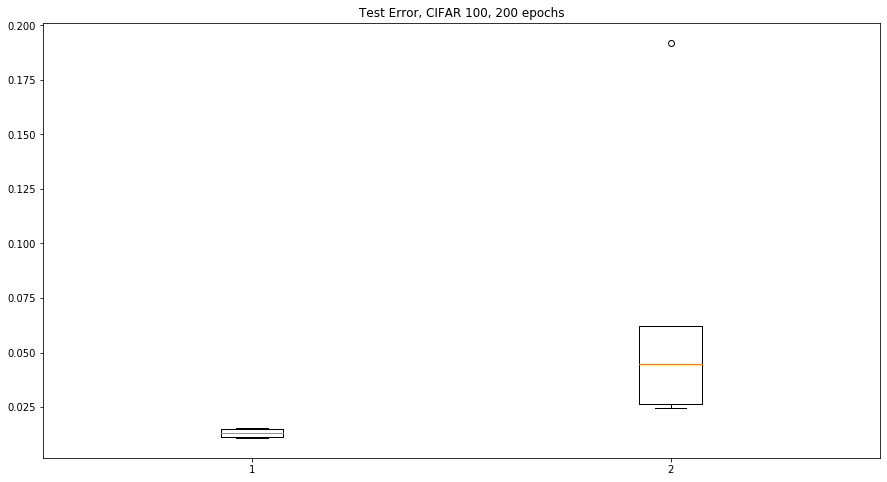

In [418]:


def helper(a):
    return a.mean(), a.std()



def test_error_stats(f):
    buf = []
    for k,v in f.items():
        #i = np.argmax(v['valid'][0]['epoch_pred1'])
        #buf += [v['test'][0]['epoch_pred1'][i]]
        buf += [np.max(v['test'][0]['epoch_pred1'])]
    return 1 - np.array(buf)


#helper(test_error(cifar100standard)), helper(test_error(cifar100SB1)),  helper(test_error(cifar100USB1))

fig1, ax1 = plt.subplots(figsize=(15, 8))

ax1.set_title('Test Error, CIFAR 100, 200 epochs')
ax1.boxplot([
    test_error_stats(standard),
    test_error_stats(old)
    ], 
    labels=[1,2])


Text(0, 0.5, 'Test Error')

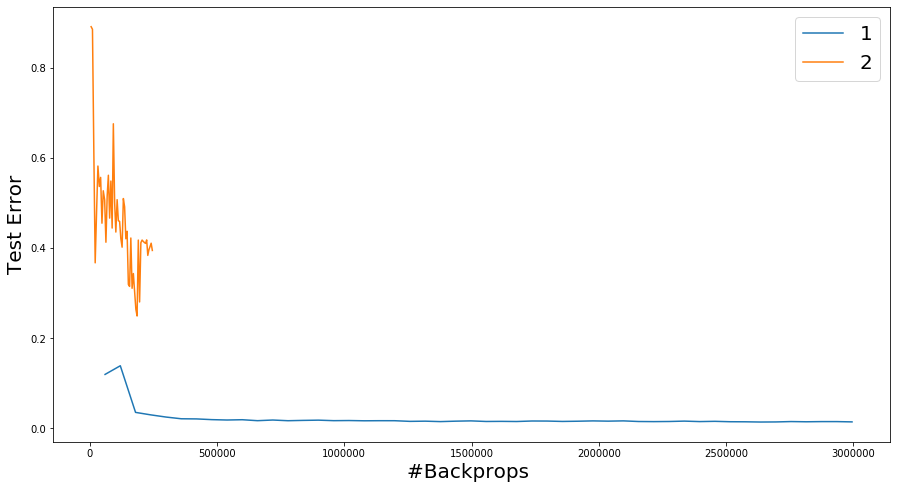

In [419]:
def get_bp(d):
    return np.cumsum(np.array([np.array(v['train'][0]['epoch_backprops']) for k, v in d.items()]).mean(0))

def get_i(d):
    return range(len(get_bp(d)))

def get_test_acc(d):
    return (1 - np.array([np.array(v['test'][0]['epoch_pred1']) for k, v in d.items()]).mean(0))[1:]

def get_train_acc(d):
    return (1 - np.array([np.array(v['train'][0]['epoch_pred1']) for k, v in d.items()]).mean(0))

def get_multiplier(d, i=0):
    return [np.mean(e) for e in d[list(d.keys())[i]]['train'][0]['multipliers']]

def get_loss(d, i=0):
    return [np.mean(a) for a in d[list(d.keys())[i]]['train'][0]['train_loss']]

def plot_this(d):
    return get_bp(d), np.array(get_test_acc(d))
    #return get_bp(d) / 1e06, np.array(get_train_acc(d))

    
    
    
fig, ax = plt.subplots(figsize=(15, 8))


bp, test_acc1 = plot_this(standard)
plt.plot(bp, test_acc1)

bp, test_acc1 = plot_this(old)
plt.plot(bp, test_acc1)

plt.legend([1,2,3,4], fontsize=20)

ax.set_xlabel("#Backprops ", size=20)
ax.set_ylabel("Test Error", size=20)

In [20]:
def analyze_loss(d, e, i):
    
    max_ = d['result-535876-lr-0.1']['train'][0]['multipliers'][e][i].argmax()
    min_ = d['result-535876-lr-0.1']['train'][0]['multipliers'][e][i].argmin()
    
    max_m = d['result-535876-lr-0.1']['train'][0]['multipliers'][e][i][max_]
    min_m = d['result-535876-lr-0.1']['train'][0]['multipliers'][e][i][min_]
    
    print ("multiplier: ", max_m, min_m)
    print ("upweighted loss: ", d['result-535876-lr-0.1']['train'][0]['examples'][e][i][max_], d['result-535876-lr-0.1']['train'][0]['examples'][e][i][min_])
    print ("origin loss: ", d['result-535876-lr-0.1']['train'][0]['examples'][e][i][max_][1] / max_m, d['result-535876-lr-0.1']['train'][0]['examples'][e][i][min_][1] / min_m)
    
analyze_loss(USB3, 19, 23)

NameError: name 'USB3' is not defined

In [ ]:
examples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


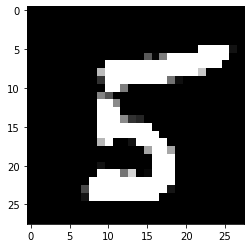

In [245]:
###### from utils.cifar import IndexedCifar10
from utils.cifar100 import IndexedCifar100
from utils.mnist import IndexedMNIST
from analysis_utils import plot_images, show_mnist_batch, show_cifar10_batch


trainset = IndexedMNIST(root='./data', train=True, download=True, transform=IndexedMNIST.transform_train)
plot_images(trainset, [46531], 1, show_mnist_batch)



In [269]:
def merge(data):
    
    data = data['train'][0]
    
    ret = []
    for epoch_idx, epoch in enumerate(data['examples']):
        epoch_buf = []
        
        for iteration_idx, iteration in enumerate(epoch):
            
            buf = data['multipliers'][epoch_idx][iteration_idx]
            
            epoch_buf += [list(zip([i[0] for i in iteration], [i[1] for i in iteration],  buf))]
        
        ret += [epoch_buf]
    return ret



def merge1(data, e):
    
    data = data['train'][0]
    
    ret = []
    for epoch_idx, epoch in enumerate(data['examples']):
        #print (epoch_idx)
        epoch_buf = None
        for iteration_idx, iteration in enumerate(epoch):
            for ii, i in enumerate(iteration):
                if i[0] == e:
                    epoch_buf = (i[0], i[1], i[1] / data['multipliers'][epoch_idx][iteration_idx][ii], 1 / data['multipliers'][epoch_idx][iteration_idx][ii])
                    break
            if epoch_buf is not None:
                break
        ret += [epoch_buf]
    return ret


def merge2(data, e):
    data = data['train'][0]
    
    ret = []
    for jj, j in enumerate(data['eval']):
        for ii, i in enumerate(j):
            if i[0] == e:
                ret += [i]
    return ret


def merge3(data_, e):
    
    
    ret = []
    for k, data in data_.items():
        ret += [merge2(data, e)]
    return ret

#cifar100lr01_up
e = 57794 #np.random.choice(len(trainset))
print (e)
old_buf = merge3(old, e)
new_buf = merge3(new, e)



57794


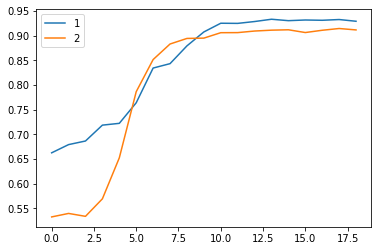

In [367]:
plt.plot(np.array([[q[3] for q in buf][:19] for buf in old_]).mean(0))
plt.plot(np.array([[q[4] for q in buf][:19] for buf in new_]).mean(0))

plt.legend([1,2])

In [359]:
len(examples)

60000

In [368]:

def helper(data, examples):
    buf = [merge3(data, e) for e in examples]
    return [[a for a in buf_[0]] for buf_ in buf]

#standard_ = helper(standard, ees)  
ees = examples[-2000:]
new_ = helper(new, ees)
old_ = helper(old, ees)
#standard_ = helper(standard, ees)

In [339]:
ees = np.random.choice(list(examples), 1000)


In [162]:
examples = np.load("disagrees_adhoc.npy")

In [169]:
examples

array([ 8425, 46525, 46531, ..., 50086,  6885,    80])

In [6]:
pct0 = np.load("dataset_overrides/mnist/0pct_random_label.npy")
pc75 = np.load("dataset_overrides/mnist/75pct_random_label.npy")
noise = set(np.array(range(len(pct0)))[pct0 != pc75])

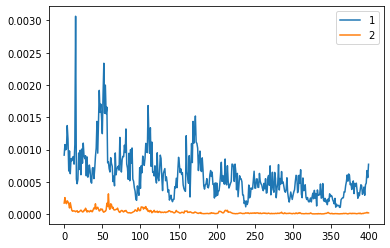

In [221]:

def just_plot(d):
    return np.hstack([[i[3] for i in e] for e in d['data']['train'][0]['loss_hist']])[-400:]

#plt.plot(just_plot(standard))   
plt.plot(just_plot(new))                     
plt.plot(just_plot(old))

plt.legend([1,2, 3])

In [190]:
#temp['result-535876-lr-0.1']['train'][0]['eval'][760] 7.428374, 44 / 20.0 (2.2)


def analyze_loss(d, e, i):
    
    max_ = d['train'][0]['multipliers'][e][i].argmax()
    min_ = d['train'][0]['multipliers'][e][i].argmin()
    
    max_m = d['train'][0]['multipliers'][e][i][max_]
    min_m = d['train'][0]['multipliers'][e][i][min_]
    
    print ("multiplier: ", max_m, min_m)
    print ("upweighted loss: ", d['train'][0]['examples'][e][i][max_], d['train'][0]['examples'][e][i][min_])
    print ("origin loss: ", d['train'][0]['examples'][e][i][max_][1] / max_m, d['train'][0]['examples'][e][i][min_][1] / min_m)
    
analyze_loss(old['data'], 19, 23)

multiplier:  1.0 1.0
upweighted loss:  (12679, 0.0052504744) (12679, 0.0052504744)
origin loss:  0.005250474438071251 0.005250474438071251


IndexError: list index out of range

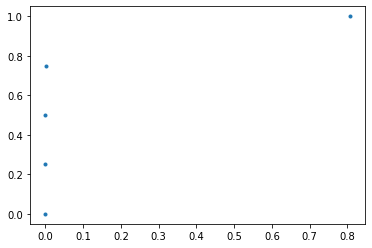

In [228]:
from IPython.display import clear_output

for e, epoch in enumerate(new['data']['train'][0]['loss_hist']):
    for i,iteration in enumerate(epoch):
        clear_output(wait=True)
        plt.plot(new['data']['train'][0]['loss_hist'][e][i], [0, .25, .5, .75, 1], '.')
        plt.plot(old['data']['train'][0]['loss_hist'][e][i], [0, .25, .5, .75, 1], '.')
        
        plt.xlim([0,10])
        plt.title("epoch: {}, iteration: {}".format(e, i))
        plt.legend(["new","old"])
        plt.show()

plt.legend([1,2,3,4,5])